Training Linear Regression
Training Ridge
Training Lasso
Linear Regression performance:
MSE: 2900.19362849348
RMSE: 53.853445836765914
R2: 0.4526027629719197
Regressor: LinearRegression()

Ridge performance:
MSE: 2856.486887670654
RMSE: 53.446111997699646
R2: 0.46085219464119254
Regressor: Ridge(alpha=0.1)

Lasso performance:
MSE: 3403.5757216070733
RMSE: 58.340172450954185
R2: 0.3575918767219115
Regressor: Lasso()



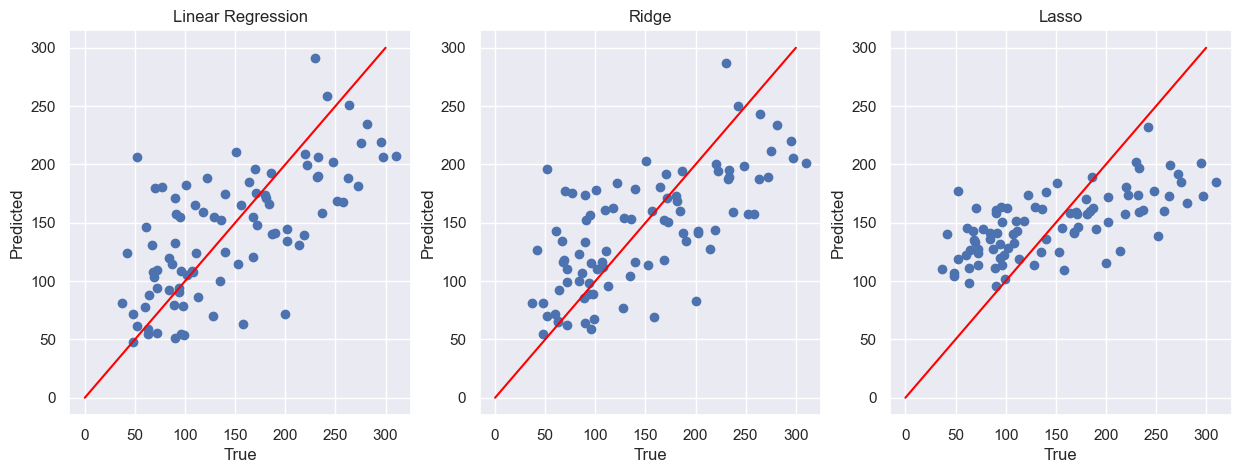

Best regressor based on RMSE: Ridge(alpha=0.1)


In [4]:
#Problem 3: Regression Estimator
# For this problem, the dataset to be used is the diabetes dataset from sklearn.

import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the regressors to be tested
regressors = {'Linear Regression': LinearRegression(),
              'Ridge': Ridge(),
              'Lasso': Lasso()}

# Define the parameter grid for the Ridge regressor
param_grid = {'alpha': [0.1, 1, 10]}

# Train and evaluate the regressors
results = {}
for name, regressor in regressors.items():
    print('Training', name)
    # For Ridge, perform a grid search to select the best alpha parameter
    if name == 'Ridge':
        grid_search = GridSearchCV(regressor, param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        best_regressor = grid_search.best_estimator_
    else:
        best_regressor = regressor.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = best_regressor.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Save the results
    results[name] = {'Regressor': best_regressor,
                     'MSE': mse,
                     'RMSE': rmse,
                     'R2': r2}

# Print the results
for name, result in results.items():
    print(name, 'performance:')
    print('MSE:', result['MSE'])
    print('RMSE:', result['RMSE'])
    print('R2:', result['R2'])
    print('Regressor:', result['Regressor'])
    print()

#Plot the results
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Plot the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, name in enumerate(results.keys()):
    ax[i].scatter(y_test, results[name]['Regressor'].predict(X_test))
    ax[i].set_title(name)
    ax[i].set_xlabel('True')
    ax[i].set_ylabel('Predicted')
    # Plot the best fit line
    x = np.linspace(0, 300, 100)
    ax[i].plot(x, x, color='red')

plt.show()


# Select the best regressor based on RMSE
best_regressor = None
best_rmse = float('inf')
for name, result in results.items():
    if result['RMSE'] < best_rmse:
        best_regressor = result['Regressor']
        best_rmse = result['RMSE']
print('Best regressor based on RMSE:', best_regressor)
